# Q 8.4.1

Build 2D decision tree

Keep splitting in the regions in half 

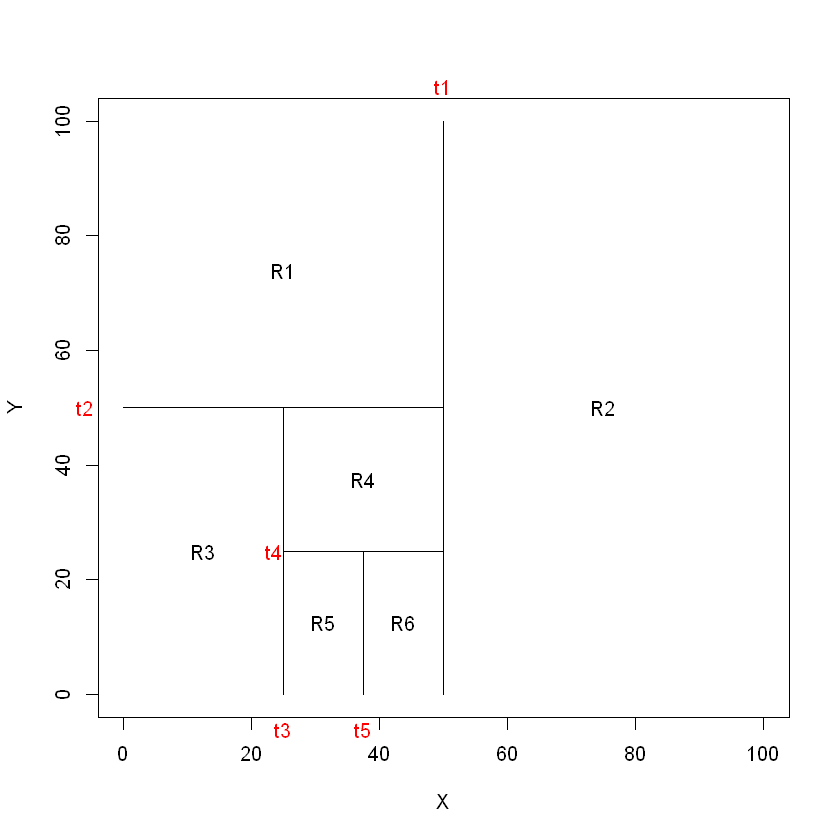

In [18]:
par(xpd = NA)
plot(NA, NA, type = "n", xlim = c(0,100), ylim = c(0,100), xlab = "X", ylab = "Y")
# t1: x = 40; (40, 0) (40, 100)
lines(x = c(50,50), y = c(0,100))
text(x = 50, y = 106, labels = c("t1"), col = "red")

lines(x = c(0,50), y = c(50,50))
text(x = -6, y = 50, labels = c("t2"), col = "red")

lines(y = c(0,50), x = c(25,25))
text(y = -6, x = 25, labels = c("t3"), col = "red")

lines(x = c(25,50), y = c(25,25))
text(x = 23.5, y = 25, labels = c("t4"), col = "red")

lines(y = c(0,25), x = c(37.5,37.5))
text(y = -6, x = 37.5, labels = c("t5"), col = "red")


text(x = 25, y = 74, labels = c("R1"))
text(x = 75, y = 50, labels = c("R2"))
text(x = 12.5, y = 25, labels = c("R3"))
text(x = 37.5, y = 37.5, labels = c("R4"))
text(x = 31.25, y = 12.5, labels = c("R5"))
text(x = 43.75, y = 12.5, labels = c("R6"))

In [19]:
        [  X<40 ] 
        |       |
    [Y<75]    [X<75]
    |   |     |    |
 [X<20] R2    R1   [Y<25]
 |    |            |    |
 R6   R5           R4   R3

ERROR: Error in parse(text = x, srcfile = src): <text>:1:9: unexpected '['
1:         [
            ^


## Q 8.4.2

This is a summation of all of our tree nodes for the entire dataset.

In [ ]:
library("IRdisplay")
display_png(file="Capture1.png")

We begin with the first node in our tree. We build a first node that minimizes our entropy.(reduce the amount of loss)

-lamda being the weight function, we being with weight = 1

In [ ]:
display_png(file="Capture2.png")  

In [ ]:
display_png(file="Capture3.png")  
display_png(file="Capture4.png")

Then we build our second node based on the function line 2. The second node is built off of the errors. (things we didn't correctly identify in the first node)

The second node is used to try to predict the errors

We progressively build our nodes by increasing the weights of the nodes that are predicting the residual values correctly. 

# Q 8.4.5

In [ ]:
x = c(0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)

Vote approach

In [ ]:
sum(x >= 0.5) > sum(x < 0.5)

Since X > .5 > sum X<.5 the probibility is red.

Average approach

In [ ]:
mean(x)

The average is less than .45, therefore we cannot classify it as red, it is GREEN.

## Q 8.4.12

## INTRO

For this problem we chose the dataset "Default" from the ISLR library. The dataset contains over a 1000 datapoints.

The dataset has four columns, displaying the balance owed, income, whether the individual is a student and if the induvidual defaulted on their loan.

The objective of this assignment was to determine whether or not an individual defaults on their loan based on their balance and income. For the sake of simplicity "student" was excluded from the calculations.



## Methodology

We will be assessing the effectiveness of boosting, bagging and Random Forests on our test dataset.

In [ ]:
library(ISLR)
head(Default)
set1 = Default
summary(set1)
library(gbm)
library(randomForest)
options(warn=-1)

In [ ]:
set.seed(1)
train <- sample(nrow(set1), nrow(Weekly) / 2)
set1$default <- ifelse(set1$default == "Yes", 1, 0)
set1.train <- set1[train, ]
set1.test <- set1[-train, ]

In [ ]:
head(set1)
summary(set1.train)
summary(set1.test)

## GLM 

In [ ]:
logit.fit <- glm(default ~ income + balance, data = set1.train, family = "binomial")
logit.probs <- predict(logit.fit, newdata = set1.test, type = "response")
logit.pred <- ifelse(logit.probs > 0.5, 1, 0)
table(set1.test$default, logit.pred)

163 + 123 = X
X + 9016 + 154 = Y

X/Y = ERROR RATE

ERROR RATE = 286/9456 = 0.03024

## Boosting

In [ ]:
boost.fit <- gbm(default ~ . - student, data = set1.train, distribution = "bernoulli", n.trees = 5000)
boost.probs <- predict(boost.fit, newdata = set1.test, n.trees = 5000)
boost.pred <- ifelse(boost.probs > 0.5, 1, 0)
table(set1.test$default, boost.pred)

290+20 = 310

310 + 9119 + 27 = 9456

ERROR RATE = 310/9456 = 0.03278

In [ ]:
bag.fit <- randomForest(default ~ . - student, data = set1.train, mtry = 6)

In [ ]:
bag.probs <- predict(bag.fit, newdata = set1.test)
bag.pred <- ifelse(bag.probs > 0.5, 1, 0)
table(set1.test$default, bag.pred)

164+188 = 352

352+8951+153 = 9456

ERROR RATE = 352/9456 = 0.03722

In [ ]:
rf.fit <- randomForest(default ~ . - student, data = set1.train, mtry = 2)

In [ ]:
rf.probs <- predict(rf.fit, newdata = set1.test)
rf.pred <- ifelse(rf.probs > 0.5, 1, 0)
table(set1.test$default, rf.pred)

160+202 = 362

362+8937+157 = 9456

ERROR RATE = 362/9456 = 0.03828

# RANDOM FOREST VS BAGGING VS BOOSTING

Bootstrap Aggregating or Bagging 
It works by taking random samples from within the data with replacement, therefore the total size of the training set remains the same.
The benifits of bagging can be capitalized if the data has high variance, however if the data is stable( lacks variance) bagging can increase error.
    
Random Forest
It is a collection of unpruned decision or regression trees.Each tree is built on a bootstrap sample and a subset of feature are considered at each split. Bagging tends to create correlated trees, Random Forest model randomizes the sample to prevent this. However because of the way it works, Random Forests is prone to overfitting.

Boosting
Boosting is similar to bagging in many ways, however it does not sample the data randomly. It assigns a weight to each observation and uses that weight for sample distribution. Higher weight = Sample is harder to classify 